In [2]:
%matplotlib inline
from sklearn import preprocessing, linear_model, metrics
from scipy.stats import ttest_ind
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
import scipy as scipy
import numpy.linalg as la
import numpy.linalg as nla

In [3]:
# Loading the heart-train.csv and heart-test.csv
heartcomplete = pd.read_csv('heart-complete.csv')
hearttrain = pd.read_csv('heart-train.csv')
hearttest = pd.read_csv('heart-test.csv')
hearttest.drop(columns="ID", inplace=True)

### Identify the dataset columns into nominal, categorical, continuous, etc. categories.

In [4]:
hearttrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        412 non-null    int64  
 1   tobacco    412 non-null    float64
 2   ldl        412 non-null    float64
 3   adiposity  412 non-null    float64
 4   famhist    412 non-null    object 
 5   typea      412 non-null    int64  
 6   obesity    412 non-null    float64
 7   alcohol    412 non-null    float64
 8   age        412 non-null    int64  
 9   chd        412 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 32.3+ KB


__Categories:__

__Nominal__ - sbp, typea, age

__Categorical__ - famhist, chd

__Continuous__ - tobacco, ldl, adiposity, obesity, alcohol

### Present insights about the data.

####  sbp

In [5]:
desc = pd.concat([hearttrain['sbp'].describe(),
                  hearttest['sbp'].describe(),
                  hearttrain.loc[hearttrain['chd'] == 0, 'sbp'].describe(),
                  hearttrain.loc[hearttrain['chd'] == 1, 'sbp'].describe()], axis=1)
desc.columns = ['sbp (Train)', 'sbp (Test)', 'sbp (Train) (chd=0)', 'sbp (Test) (chd=1)']
desc

,sbp (Train),sbp (Test),sbp (Train) (chd=0),sbp (Test) (chd=1)
count,412.000000,143.000000,275.000000,137.000000
mean,139.240291,134.013986,136.756364,144.226277
std,20.451903,18.468087,18.036123,23.898989
min,101.000000,103.000000,101.000000,102.000000
25%,125.500000,122.000000,124.000000,130.000000
50%,136.000000,130.000000,134.000000,138.000000
75%,148.000000,141.000000,146.000000,156.000000
max,218.000000,208.000000,214.000000,218.000000


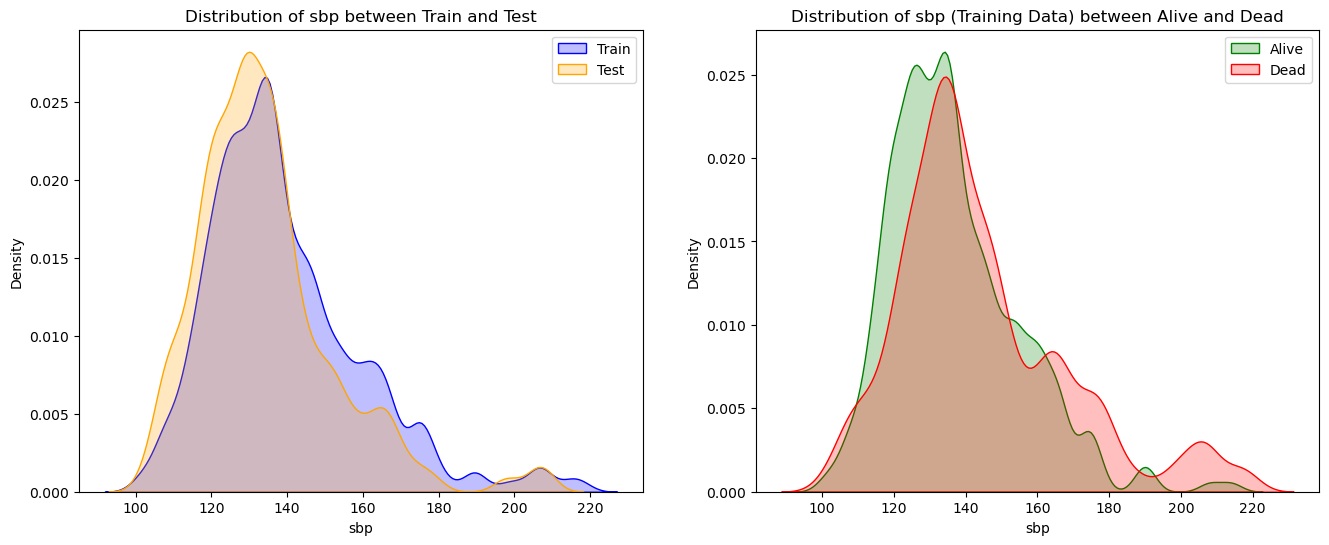

In [6]:
chd0 = hearttrain.loc[hearttrain['chd'] == 0]
chd1 = hearttrain.loc[hearttrain['chd'] == 1]
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
_ = sns.kdeplot(data=hearttrain, x='sbp', bw_adjust=0.5, color='blue', label='Train', fill=True, ax=ax[0])
_ = sns.kdeplot(data=hearttest, x='sbp', bw_adjust=0.5, color='orange', label='Test', fill=True, ax=ax[0])
ax[0].set_title('Distribution of sbp between Train and Test')
ax[0].legend()
_ = sns.kdeplot(data=chd0, x='sbp', bw_adjust=0.5, color='green', label='Alive', fill=True, ax=ax[1])
_ = sns.kdeplot(data=chd1, x='sbp', bw_adjust=0.5, color='red', label='Dead', fill=True, ax=ax[1])
ax[1].set_title('Distribution of sbp (Training Data) between Alive and Dead')
ax[1].legend()
plt.show()

In [7]:
_, p_value = ttest_ind(hearttrain['sbp'], hearttest['sbp'])
print(f"p-value for independent t-test between Train and Test data for sbp - {p_value}")
_, p_value = ttest_ind(hearttrain.loc[hearttrain['chd'] == 0, 'sbp'], hearttrain.loc[hearttrain['chd'] == 1, 'sbp'])
print(f"p-value for independent t-test between chd=0 and chd=1 data for sbp - {p_value}")

p-value for independent t-test between Train and Test data for sbp - 0.007197557949024814
p-value for independent t-test between chd=0 and chd=1 data for sbp - 0.0004437285810883951


__Insights on `sbp`__

- The summary statistics for `sbp` between Train and Test shows that there is some difference between the 2 samples.
- Upon visualizing the distribution of `sbp`, it is roughly the same shape between Train and Test data.
- The difference between the summary statistics of the Train and Test samples for `sbp` is shown to be statistically significant upon conducting independent t-test (p-value < 0.05).
- The summary statistics for `sbp` between chd=0 and chd=1 shows that there is some difference between the 2 samples.
- Upon visualizing the distribution of `sbp`, it is roughly the same shape between chd=0 and chd=1 data.
- The difference between the summary statistics of the chd=0 and chd=1 samples for `sbp` is shown to be statistically significant upon conducting independent t-test (p-value < 0.05).

#### typea

In [8]:
desc = pd.concat([hearttrain['typea'].describe(),
                  hearttest['typea'].describe(),
                  hearttrain.loc[hearttrain['chd'] == 0, 'typea'].describe(),
                  hearttrain.loc[hearttrain['chd'] == 1, 'typea'].describe()], axis=1)
desc.columns = ['typea (Train)', 'typea (Test)', 'typea (Train) (chd=0)', 'typea (Test) (chd=1)']
desc

,typea (Train),typea (Test),typea (Train) (chd=0),typea (Test) (chd=1)
count,412.000000,143.000000,275.000000,137.000000
mean,52.135922,54.706294,51.661818,53.087591
std,9.592727,9.352888,9.087480,10.504533
min,20.000000,30.000000,25.000000,20.000000
25%,46.000000,48.000000,46.000000,46.000000
50%,52.000000,54.000000,52.000000,53.000000
75%,58.000000,61.500000,57.500000,60.000000
max,73.000000,78.000000,73.000000,73.000000


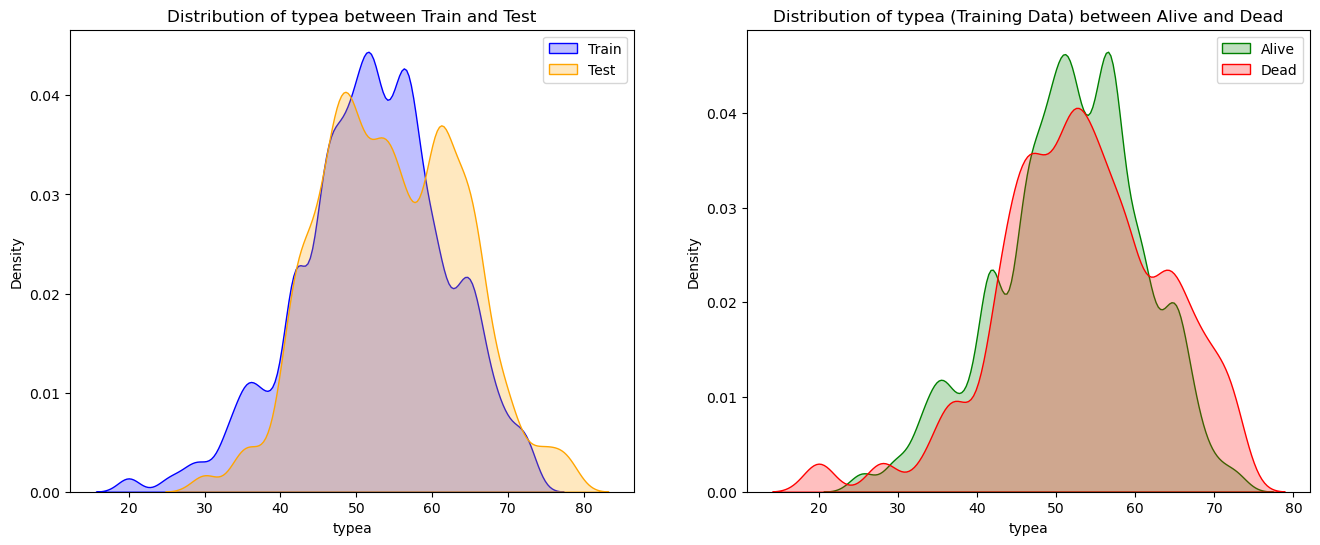

In [9]:
chd0 = hearttrain.loc[hearttrain['chd'] == 0]
chd1 = hearttrain.loc[hearttrain['chd'] == 1]
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
_ = sns.kdeplot(data=hearttrain, x='typea', bw_adjust=0.5, color='blue', label='Train', fill=True, ax=ax[0])
_ = sns.kdeplot(data=hearttest, x='typea', bw_adjust=0.5, color='orange', label='Test', fill=True, ax=ax[0])
ax[0].set_title('Distribution of typea between Train and Test')
ax[0].legend()
_ = sns.kdeplot(data=chd0, x='typea', bw_adjust=0.5, color='green', label='Alive', fill=True, ax=ax[1])
_ = sns.kdeplot(data=chd1, x='typea', bw_adjust=0.5, color='red', label='Dead', fill=True, ax=ax[1])
ax[1].set_title('Distribution of typea (Training Data) between Alive and Dead')
ax[1].legend()
plt.show()

In [10]:
_, p_value = ttest_ind(hearttrain['typea'], hearttest['typea'])
print(f"p-value for independent t-test between Train and Test data for typea - {p_value}")
_, p_value = ttest_ind(hearttrain.loc[hearttrain['chd'] == 0, 'typea'], hearttrain.loc[hearttrain['chd'] == 1, 'typea'])
print(f"p-value for independent t-test between chd=0 and chd=1 data for typea - {p_value}")

p-value for independent t-test between Train and Test data for typea - 0.00564833204680329
p-value for independent t-test between chd=0 and chd=1 data for typea - 0.15547533366513577


__Insights on `typea`__

- The summary statistics for `typea` between Train and Test shows that there is some difference between the 2 samples.
- Upon visualizing the distribution of `typea`, it is roughly the same shape between Train and Test data.
- The difference between the summary statistics of the Train and Test samples for `typea` is shown to be statistically significant upon conducting independent t-test (p-value < 0.05).
- The summary statistics for `typea` between chd=0 and chd=1 shows that there is some difference between the 2 samples.
- Upon visualizing the distribution of `typea`, it is roughly the same shape between chd=0 and chd=1 data.
- The difference between the summary statistics of the chd=0 and chd=1 samples for `typea` is shown to be statistically insignificant upon conducting independent t-test (p-value > 0.05).

#### age

In [11]:
desc = pd.concat([hearttrain['age'].describe(),
                  hearttest['age'].describe(),
                  hearttrain.loc[hearttrain['chd'] == 0, 'age'].describe(),
                  hearttrain.loc[hearttrain['chd'] == 1, 'age'].describe()], axis=1)
desc.columns = ['age (Train)', 'age (Test)', 'age (Train) (chd=0)', 'age (Test) (chd=1)']
desc

,age (Train),age (Test),age (Train) (chd=0),age (Test) (chd=1)
count,412.000000,143.000000,275.000000,137.000000
mean,42.686893,39.608392,38.701818,50.686131
std,15.129338,14.865612,15.477975,10.607123
min,15.000000,15.000000,15.000000,17.000000
25%,30.750000,28.000000,26.000000,43.000000
50%,45.000000,40.000000,40.000000,54.000000
75%,57.000000,53.000000,51.000000,59.000000
max,64.000000,64.000000,64.000000,64.000000


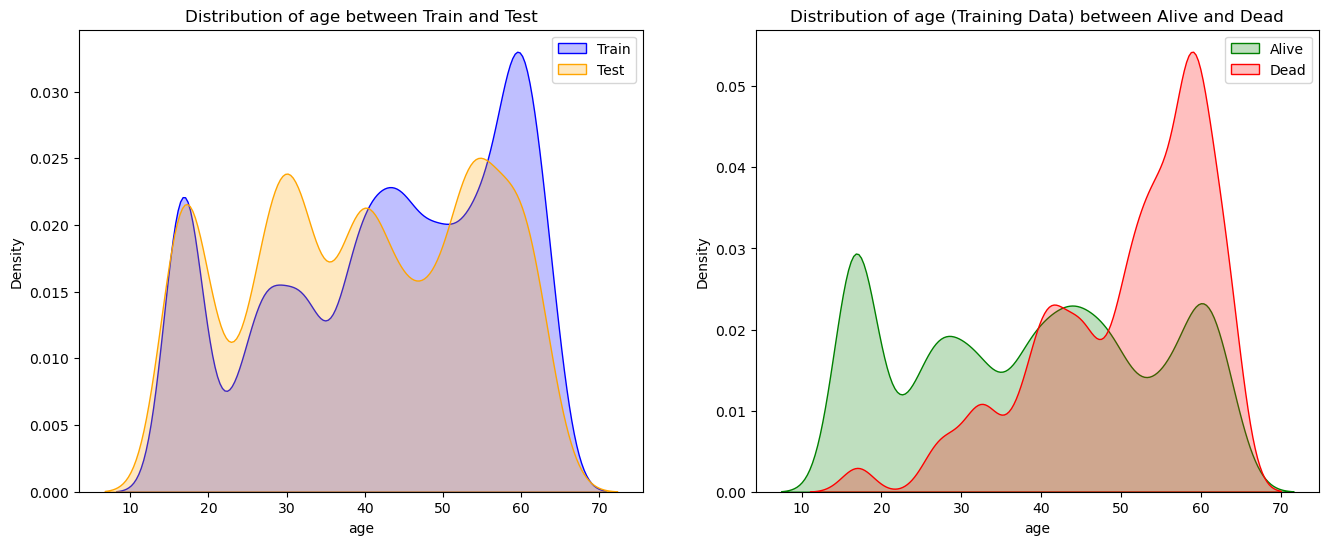

In [12]:
chd0 = hearttrain.loc[hearttrain['chd'] == 0]
chd1 = hearttrain.loc[hearttrain['chd'] == 1]
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
_ = sns.kdeplot(data=hearttrain, x='age', bw_adjust=0.5, color='blue', label='Train', fill=True, ax=ax[0])
_ = sns.kdeplot(data=hearttest, x='age', bw_adjust=0.5, color='orange', label='Test', fill=True, ax=ax[0])
ax[0].set_title('Distribution of age between Train and Test')
ax[0].legend()
_ = sns.kdeplot(data=chd0, x='age', bw_adjust=0.5, color='green', label='Alive', fill=True, ax=ax[1])
_ = sns.kdeplot(data=chd1, x='age', bw_adjust=0.5, color='red', label='Dead', fill=True, ax=ax[1])
ax[1].set_title('Distribution of age (Training Data) between Alive and Dead')
ax[1].legend()
plt.show()

In [13]:
_, p_value = ttest_ind(hearttrain['age'], hearttest['age'])
print(f"p-value for independent t-test between Train and Test data for age - {p_value}")
_, p_value = ttest_ind(hearttrain.loc[hearttrain['chd'] == 0, 'age'], hearttrain.loc[hearttrain['chd'] == 1, 'age'])
print(f"p-value for independent t-test between chd=0 and chd=1 data for age - {p_value}")

p-value for independent t-test between Train and Test data for age - 0.035668506164145054
p-value for independent t-test between chd=0 and chd=1 data for age - 4.262224557429221e-15


__Insights on `age`__

- The summary statistics for `age` between Train and Test shows that there is some difference between the 2 samples.
- Upon visualizing the distribution of `age`, it is not the same shape between Train and Test data.
- The difference between the summary statistics of the Train and Test samples for `age` is shown to be statistically significant upon conducting independent t-test (p-value < 0.05).
- The summary statistics for `age` between chd=0 and chd=1 shows that there is some difference between the 2 samples.
- Upon visualizing the distribution of `age`, it is not the same shape between chd=0 and chd=1 data.
- The difference between the summary statistics of the chd=0 and chd=1 samples for `age` is shown to be statistically significant upon conducting independent t-test (p-value < 0.05).

####  tobacco

In [14]:
desc = pd.concat([hearttrain['tobacco'].describe(),
                  hearttest['tobacco'].describe(),
                  hearttrain.loc[hearttrain['chd'] == 0, 'tobacco'].describe(),
                  hearttrain.loc[hearttrain['chd'] == 1, 'tobacco'].describe()], axis=1)
desc.columns = ['tobacco (Train)', 'tobacco (Test)', 'tobacco (Train) (chd=0)', 'tobacco (Test) (chd=1)']
desc

,tobacco (Train),tobacco (Test),tobacco (Train) (chd=0),tobacco (Test) (chd=1)
count,412.000000,143.000000,275.000000,137.000000
mean,3.666262,3.665594,2.733673,5.538248
std,4.518501,4.426044,3.744624,5.306749
min,0.000000,0.000000,0.000000,0.000000
25%,0.037500,0.065000,0.000000,1.350000
50%,1.805000,1.910000,1.050000,4.200000
75%,5.850000,5.995000,4.305000,8.400000
max,27.400000,27.400000,20.000000,27.400000


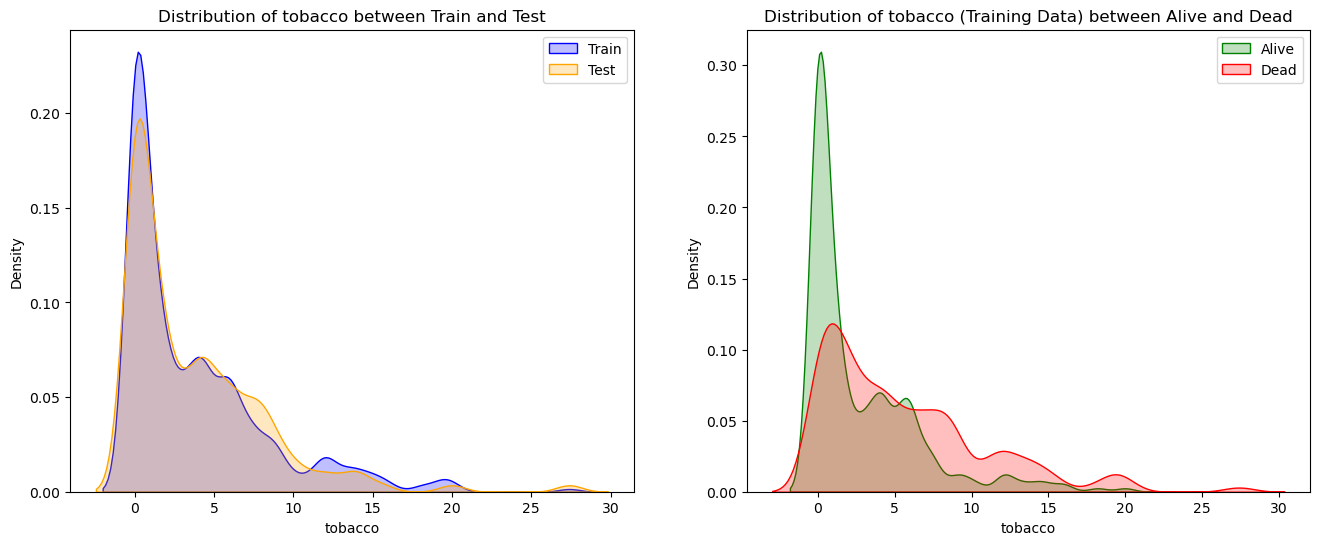

In [15]:
chd0 = hearttrain.loc[hearttrain['chd'] == 0]
chd1 = hearttrain.loc[hearttrain['chd'] == 1]
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
_ = sns.kdeplot(data=hearttrain, x='tobacco', bw_adjust=0.5, color='blue', label='Train', fill=True, ax=ax[0])
_ = sns.kdeplot(data=hearttest, x='tobacco', bw_adjust=0.5, color='orange', label='Test', fill=True, ax=ax[0])
ax[0].set_title('Distribution of tobacco between Train and Test')
ax[0].legend()
_ = sns.kdeplot(data=chd0, x='tobacco', bw_adjust=0.5, color='green', label='Alive', fill=True, ax=ax[1])
_ = sns.kdeplot(data=chd1, x='tobacco', bw_adjust=0.5, color='red', label='Dead', fill=True, ax=ax[1])
ax[1].set_title('Distribution of tobacco (Training Data) between Alive and Dead')
ax[1].legend()
plt.show()

In [16]:
_, p_value = ttest_ind(hearttrain['tobacco'], hearttest['tobacco'])
print(f"p-value for independent t-test between Train and Test data for tobacco - {p_value}")
_, p_value = ttest_ind(hearttrain.loc[hearttrain['chd'] == 0, 'tobacco'], hearttrain.loc[hearttrain['chd'] == 1, 'tobacco'])
print(f"p-value for independent t-test between chd=0 and chd=1 data for tobacco - {p_value}")

p-value for independent t-test between Train and Test data for tobacco - 0.9987793511506721
p-value for independent t-test between chd=0 and chd=1 data for tobacco - 1.3798394431132597e-09


__Insights on `tobacco`__

- The summary statistics for `tobacco` between Train and Test shows that there is some difference between the 2 samples.
- Upon visualizing the distribution of `tobacco`, it is the same shape between Train and Test data.
- The difference between the summary statistics of the Train and Test samples for `tobacco` is shown to be statistically insignificant upon conducting independent t-test (p-value > 0.05).
- The summary statistics for `tobacco` between chd=0 and chd=1 shows that there is some difference between the 2 samples.
- Upon visualizing the distribution of `tobacco`, it is not the same shape between chd=0 and chd=1 data.
- The difference between the summary statistics of the chd=0 and chd=1 samples for `tobacco` is shown to be statistically significant upon conducting independent t-test (p-value < 0.05).

#### ldl

In [17]:
desc = pd.concat([hearttrain['ldl'].describe(),
                  hearttest['ldl'].describe(),
                  hearttrain.loc[hearttrain['chd'] == 0, 'ldl'].describe(),
                  hearttrain.loc[hearttrain['chd'] == 1, 'ldl'].describe()], axis=1)
desc.columns = ['ldl (Train)', 'ldl (Test)', 'ldl (Train) (chd=0)', 'ldl (Test) (chd=1)']
desc

,ldl (Train),ldl (Test),ldl (Train) (chd=0),ldl (Test) (chd=1)
count,412.000000,143.000000,275.000000,137.000000
mean,4.589539,4.663916,4.227673,5.315912
std,1.883744,2.288188,1.658315,2.094518
min,0.980000,1.070000,0.980000,2.390000
25%,3.240000,3.080000,3.050000,3.900000
50%,4.225000,4.190000,3.960000,4.980000
75%,5.527500,5.780000,5.090000,6.380000
max,14.160000,15.330000,9.650000,14.160000


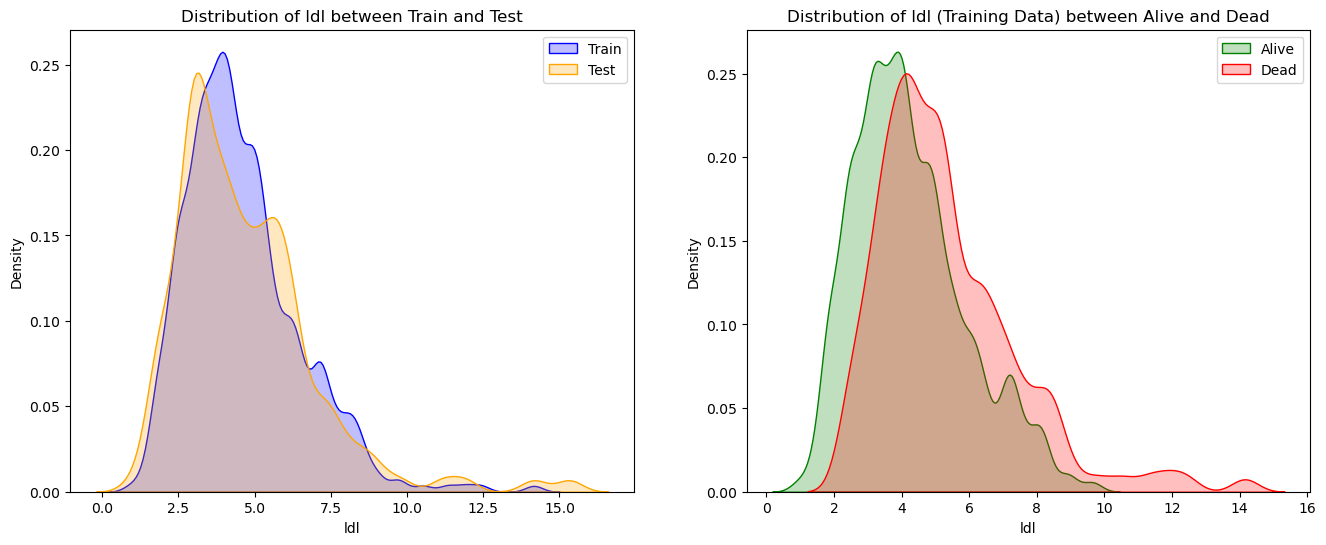

In [18]:
chd0 = hearttrain.loc[hearttrain['chd'] == 0]
chd1 = hearttrain.loc[hearttrain['chd'] == 1]
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
_ = sns.kdeplot(data=hearttrain, x='ldl', bw_adjust=0.5, color='blue', label='Train', fill=True, ax=ax[0])
_ = sns.kdeplot(data=hearttest, x='ldl', bw_adjust=0.5, color='orange', label='Test', fill=True, ax=ax[0])
ax[0].set_title('Distribution of ldl between Train and Test')
ax[0].legend()
_ = sns.kdeplot(data=chd0, x='ldl', bw_adjust=0.5, color='green', label='Alive', fill=True, ax=ax[1])
_ = sns.kdeplot(data=chd1, x='ldl', bw_adjust=0.5, color='red', label='Dead', fill=True, ax=ax[1])
ax[1].set_title('Distribution of ldl (Training Data) between Alive and Dead')
ax[1].legend()
plt.show()

In [19]:
_, p_value = ttest_ind(hearttrain['ldl'], hearttest['ldl'])
print(f"p-value for independent t-test between Train and Test data for ldl - {p_value}")
_, p_value = ttest_ind(hearttrain.loc[hearttrain['chd'] == 0, 'ldl'], hearttrain.loc[hearttrain['chd'] == 1, 'ldl'])
print(f"p-value for independent t-test between chd=0 and chd=1 data for ldl - {p_value}")

p-value for independent t-test between Train and Test data for ldl - 0.7010989397298415
p-value for independent t-test between chd=0 and chd=1 data for ldl - 1.8988053896338257e-08


__Insights on `ldl`__

- The summary statistics for `ldl` between Train and Test shows that there is some difference between the 2 samples.
- Upon visualizing the distribution of `ldl`, it is almost the shape between Train and Test data.
- The difference between the summary statistics of the Train and Test samples for `ldl` is shown to be statistically insignificant upon conducting independent t-test (p-value > 0.05).
- The summary statistics for `ldl` between chd=0 and chd=1 shows that there is some difference between the 2 samples.
- Upon visualizing the distribution of `ldl`, it is almost the same shape between chd=0 and chd=1 data.
- The difference between the summary statistics of the chd=0 and chd=1 samples for `ldl` is shown to be statistically significant upon conducting independent t-test (p-value < 0.05).

####  adiposity

In [20]:
desc = pd.concat([hearttrain['adiposity'].describe(),
                  hearttest['adiposity'].describe(),
                  hearttrain.loc[hearttrain['chd'] == 0, 'adiposity'].describe(),
                  hearttrain.loc[hearttrain['chd'] == 1, 'adiposity'].describe()], axis=1)
desc.columns = ['adiposity (Train)', 'adiposity (Test)', 'adiposity (Train) (chd=0)', 'adiposity (Test) (chd=1)']
desc

,adiposity (Train),adiposity (Test),adiposity (Train) (chd=0),adiposity (Test) (chd=1)
count,412.000000,143.000000,275.000000,137.000000
mean,25.151214,23.729930,23.772182,27.919343
std,7.740794,7.762301,7.824058,6.795965
min,6.740000,6.740000,6.740000,11.590000
25%,19.397500,17.420000,17.160000,23.660000
50%,26.090000,24.060000,24.590000,27.890000
75%,30.755000,29.265000,29.830000,33.020000
max,42.490000,42.490000,42.060000,42.490000


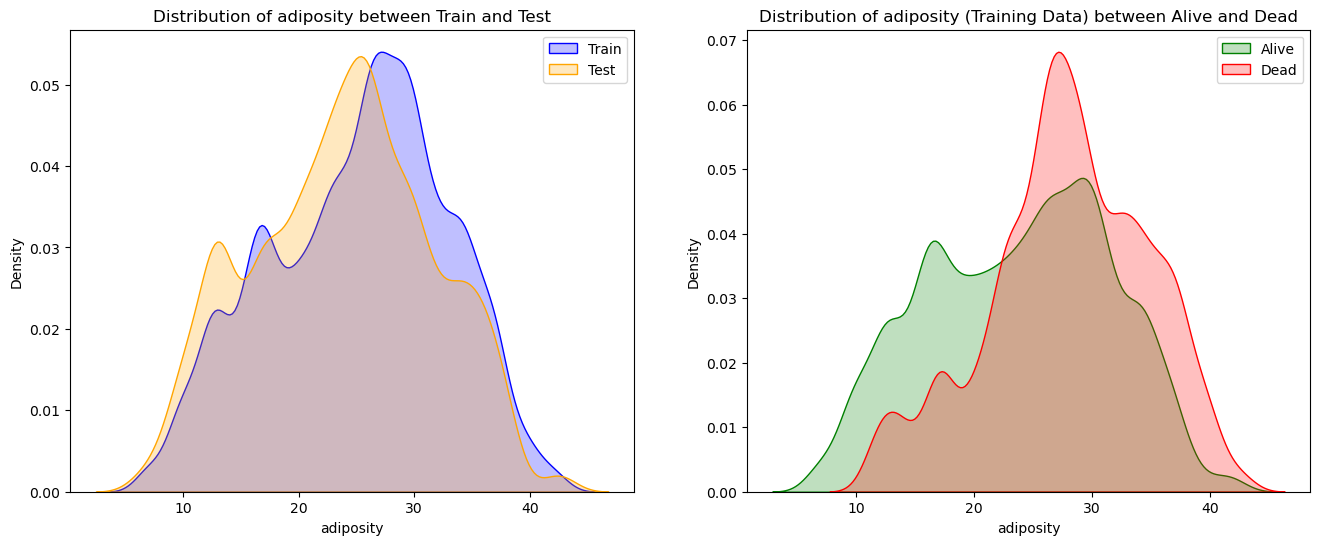

In [21]:
chd0 = hearttrain.loc[hearttrain['chd'] == 0]
chd1 = hearttrain.loc[hearttrain['chd'] == 1]
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
_ = sns.kdeplot(data=hearttrain, x='adiposity', bw_adjust=0.5, color='blue', label='Train', fill=True, ax=ax[0])
_ = sns.kdeplot(data=hearttest, x='adiposity', bw_adjust=0.5, color='orange', label='Test', fill=True, ax=ax[0])
ax[0].set_title('Distribution of adiposity between Train and Test')
ax[0].legend()
_ = sns.kdeplot(data=chd0, x='adiposity', bw_adjust=0.5, color='green', label='Alive', fill=True, ax=ax[1])
_ = sns.kdeplot(data=chd1, x='adiposity', bw_adjust=0.5, color='red', label='Dead', fill=True, ax=ax[1])
ax[1].set_title('Distribution of adiposity (Training Data) between Alive and Dead')
ax[1].legend()
plt.show()

In [22]:
_, p_value = ttest_ind(hearttrain['adiposity'], hearttest['adiposity'])
print(f"p-value for independent t-test between Train and Test data for adiposity - {p_value}")
_, p_value = ttest_ind(hearttrain.loc[hearttrain['chd'] == 0, 'adiposity'], hearttrain.loc[hearttrain['chd'] == 1, 'adiposity'])
print(f"p-value for independent t-test between chd=0 and chd=1 data for adiposity - {p_value}")

p-value for independent t-test between Train and Test data for adiposity - 0.05922613958614115
p-value for independent t-test between chd=0 and chd=1 data for adiposity - 2.009194782185551e-07


__Insights on `adiposity`__

- The summary statistics for `adiposity` between Train and Test shows that there is some difference between the 2 samples.
- Upon visualizing the distribution of `adiposity`, it is similar shape between Train and Test data.
- The difference between the summary statistics of the Train and Test samples for `adiposity` is shown to be statistically insignificant upon conducting independent t-test (p-value > 0.05).
- The summary statistics for `adiposity` between chd=0 and chd=1 shows that there is some difference between the 2 samples.
- Upon visualizing the distribution of `adiposity`, it is quite different shape between chd=0 and chd=1 data.
- The difference between the summary statistics of the chd=0 and chd=1 samples for `adiposity` is shown to be statistically significant upon conducting independent t-test (p-value < 0.05).

#### obesity

In [23]:
desc = pd.concat([hearttrain['obesity'].describe(),
                  hearttest['obesity'].describe(),
                  hearttrain.loc[hearttrain['chd'] == 0, 'obesity'].describe(),
                  hearttrain.loc[hearttrain['chd'] == 1, 'obesity'].describe()], axis=1)
desc.columns = ['obesity (Train)', 'obesity (Test)', 'obesity (Train) (chd=0)', 'obesity (Test) (chd=1)']
desc

,obesity (Train),obesity (Test),obesity (Train) (chd=0),obesity (Test) (chd=1)
count,412.000000,143.000000,275.000000,137.000000
mean,25.802112,25.778951,25.476291,26.456131
std,4.081745,4.455007,3.834968,4.480362
min,17.890000,17.750000,17.890000,18.460000
25%,22.737500,22.600000,22.510000,23.350000
50%,25.635000,25.380000,24.980000,26.380000
75%,28.167500,28.220000,27.835000,28.510000
max,45.720000,46.580000,40.340000,45.720000


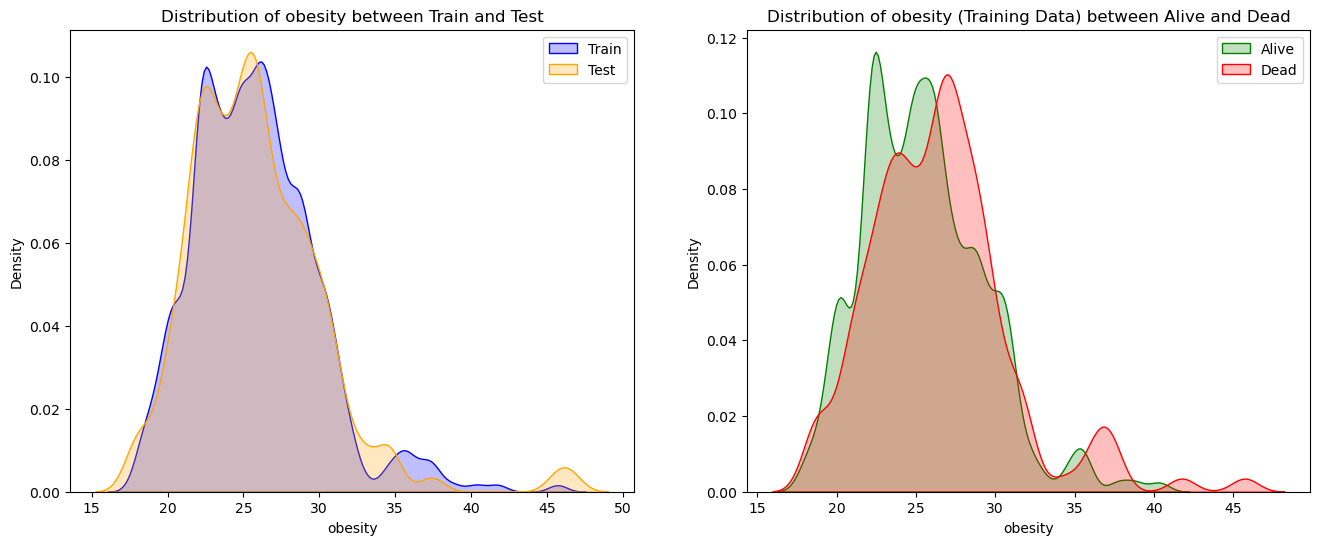

In [24]:
chd0 = hearttrain.loc[hearttrain['chd'] == 0]
chd1 = hearttrain.loc[hearttrain['chd'] == 1]
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
_ = sns.kdeplot(data=hearttrain, x='obesity', bw_adjust=0.5, color='blue', label='Train', fill=True, ax=ax[0])
_ = sns.kdeplot(data=hearttest, x='obesity', bw_adjust=0.5, color='orange', label='Test', fill=True, ax=ax[0])
ax[0].set_title('Distribution of obesity between Train and Test')
ax[0].legend()
_ = sns.kdeplot(data=chd0, x='obesity', bw_adjust=0.5, color='green', label='Alive', fill=True, ax=ax[1])
_ = sns.kdeplot(data=chd1, x='obesity', bw_adjust=0.5, color='red', label='Dead', fill=True, ax=ax[1])
ax[1].set_title('Distribution of obesity (Training Data) between Alive and Dead')
ax[1].legend()
plt.show()

In [25]:
_, p_value = ttest_ind(hearttrain['obesity'], hearttest['obesity'])
print(f"p-value for independent t-test between Train and Test data for obesity - {p_value}")
_, p_value = ttest_ind(hearttrain.loc[hearttrain['chd'] == 0, 'obesity'], hearttrain.loc[hearttrain['chd'] == 1, 'obesity'])
print(f"p-value for independent t-test between chd=0 and chd=1 data for obesity - {p_value}")

p-value for independent t-test between Train and Test data for obesity - 0.9545042343614394
p-value for independent t-test between chd=0 and chd=1 data for obesity - 0.02151857685393018


__Insights on `obesity`__

- The summary statistics for `obesity` between Train and Test shows that there is some difference between the 2 samples.
- Upon visualizing the distribution of `obesity`, it is same shape between Train and Test data.
- The difference between the summary statistics of the Train and Test samples for `obesity` is shown to be statistically insignificant upon conducting independent t-test (p-value > 0.05).
- The summary statistics for `obesity` between chd=0 and chd=1 shows that there is some difference between the 2 samples.
- Upon visualizing the distribution of `obesity`, it is different shape between chd=0 and chd=1 data.
- The difference between the summary statistics of the chd=0 and chd=1 samples for `obesity` is shown to be statistically significant upon conducting independent t-test (p-value < 0.05).

####  alcohol

In [26]:
desc = pd.concat([hearttrain['alcohol'].describe(),
                  hearttest['alcohol'].describe(),
                  hearttrain.loc[hearttrain['chd'] == 0, 'alcohol'].describe(),
                  hearttrain.loc[hearttrain['chd'] == 1, 'alcohol'].describe()], axis=1)
desc.columns = ['alcohol (Train)', 'alcohol (Test)', 'alcohol (Train) (chd=0)', 'alcohol (Test) (chd=1)']
desc

,alcohol (Train),alcohol (Test),alcohol (Train) (chd=0),alcohol (Test) (chd=1)
count,412.000000,143.000000,275.000000,137.000000
mean,18.030073,17.553077,17.790036,18.511898
std,25.298909,25.933270,25.470899,25.035941
min,0.000000,0.000000,0.000000,0.000000
25%,0.447500,0.595000,0.510000,0.260000
50%,7.510000,6.510000,7.610000,7.410000
75%,24.960000,24.325000,25.385000,24.890000
max,145.290000,147.190000,145.290000,120.030000


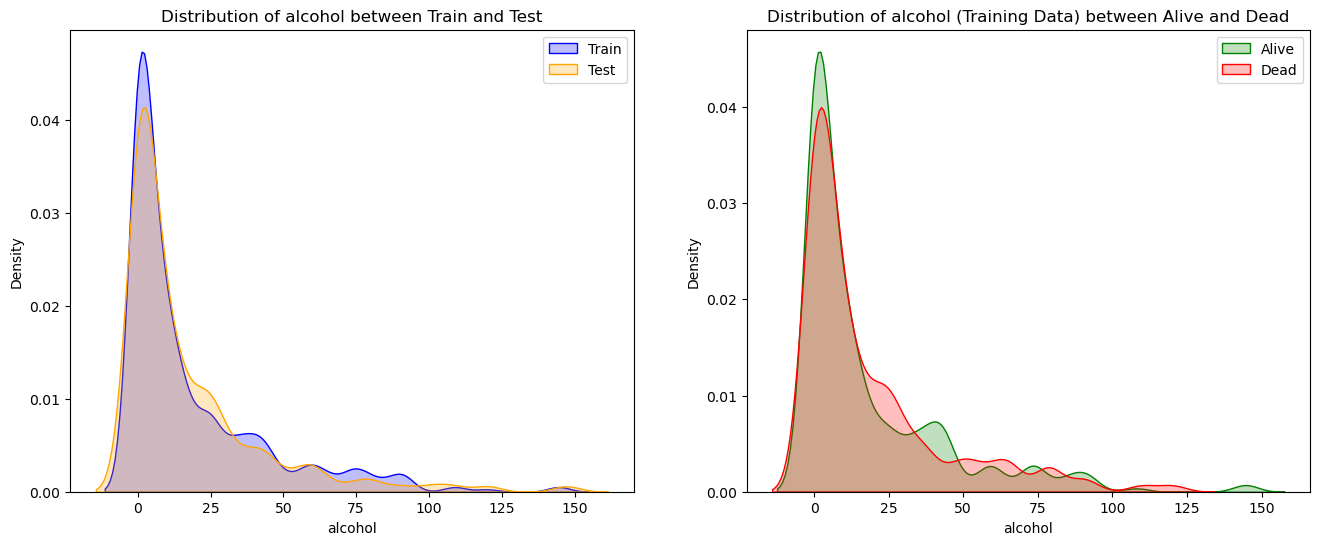

In [27]:
chd0 = hearttrain.loc[hearttrain['chd'] == 0]
chd1 = hearttrain.loc[hearttrain['chd'] == 1]
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
_ = sns.kdeplot(data=hearttrain, x='alcohol', bw_adjust=0.5, color='blue', label='Train', fill=True, ax=ax[0])
_ = sns.kdeplot(data=hearttest, x='alcohol', bw_adjust=0.5, color='orange', label='Test', fill=True, ax=ax[0])
ax[0].set_title('Distribution of alcohol between Train and Test')
ax[0].legend()
_ = sns.kdeplot(data=chd0, x='alcohol', bw_adjust=0.5, color='green', label='Alive', fill=True, ax=ax[1])
_ = sns.kdeplot(data=chd1, x='alcohol', bw_adjust=0.5, color='red', label='Dead', fill=True, ax=ax[1])
ax[1].set_title('Distribution of alcohol (Training Data) between Alive and Dead')
ax[1].legend()
plt.show()

In [28]:
_, p_value = ttest_ind(hearttrain['alcohol'], hearttest['alcohol'])
print(f"p-value for independent t-test between Train and Test data for alcohol - {p_value}")
_, p_value = ttest_ind(hearttrain.loc[hearttrain['chd'] == 0, 'alcohol'], hearttrain.loc[hearttrain['chd'] == 1, 'alcohol'])
print(f"p-value for independent t-test between chd=0 and chd=1 data for alcohol - {p_value}")

p-value for independent t-test between Train and Test data for alcohol - 0.8470254379879693
p-value for independent t-test between chd=0 and chd=1 data for alcohol - 0.7853391377836237


__Insights on `alcohol`__

- The summary statistics for `alcohol` between Train and Test shows that there is some difference between the 2 samples.
- Upon visualizing the distribution of `alcohol`, it is same shape between Train and Test data.
- The difference between the summary statistics of the Train and Test samples for `alcohol` is shown to be statistically insignificant upon conducting independent t-test (p-value > 0.05).
- The summary statistics for `alcohol` between chd=0 and chd=1 shows that there is some difference between the 2 samples.
- Upon visualizing the distribution of `alcohol`, it is same shape between chd=0 and chd=1 data.
- The difference between the summary statistics of the chd=0 and chd=1 samples for `alcohol` is shown to be statistically insignificant upon conducting independent t-test (p-value > 0.05).

#### famhist

In [29]:
desc = pd.concat([hearttrain['famhist'].describe(),
                  hearttest['famhist'].describe(),
                  hearttrain.loc[hearttrain['chd'] == 0, 'famhist'].describe(),
                  hearttrain.loc[hearttrain['chd'] == 1, 'famhist'].describe()], axis=1)
desc.columns = ['famhist (Train)', 'famhist (Test)', 'famhist (Train) (chd=0)', 'famhist (Test) (chd=1)']
desc

,famhist (Train),famhist (Test),famhist (Train) (chd=0),famhist (Test) (chd=1)
count,412,143,275,137
unique,2,2,2,2
top,Absent,Absent,Absent,Present
freq,239,92,179,77


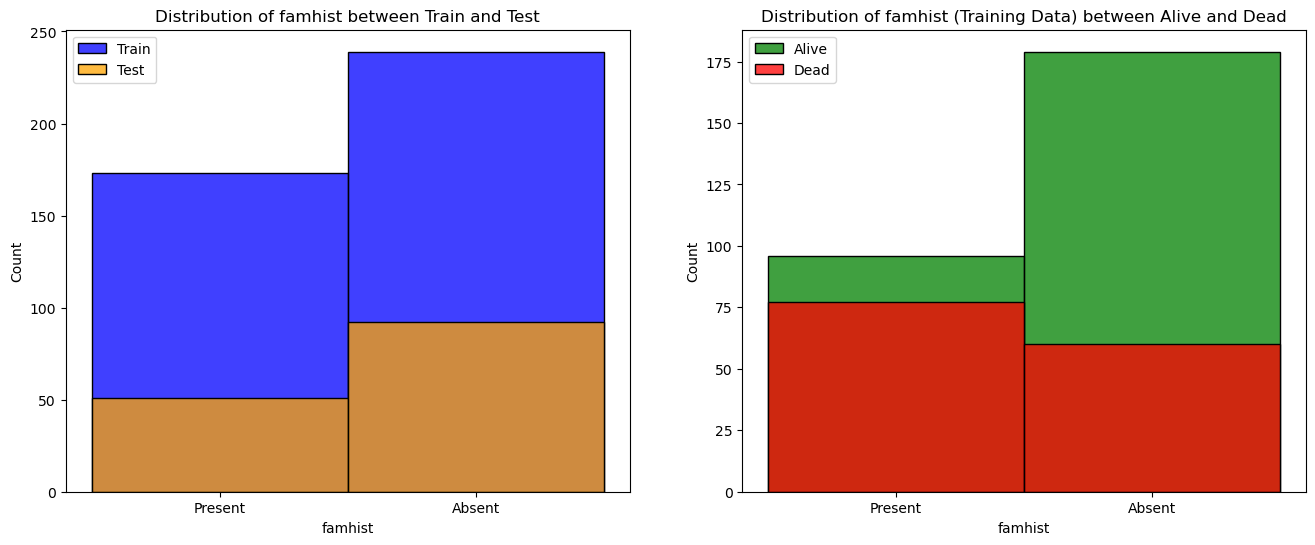

In [30]:
chd0 = hearttrain.loc[hearttrain['chd'] == 0]
chd1 = hearttrain.loc[hearttrain['chd'] == 1]
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
_ = sns.histplot(data=hearttrain, x='famhist', bins=4, color='blue', label='Train', fill=True, ax=ax[0])
_ = sns.histplot(data=hearttest, x='famhist', bins=4, color='orange', label='Test', fill=True, ax=ax[0])
ax[0].set_title('Distribution of famhist between Train and Test')
ax[0].legend()
_ = sns.histplot(data=chd0, x='famhist', bins=4, color='green', label='Alive', fill=True, ax=ax[1])
_ = sns.histplot(data=chd1, x='famhist', bins=4, color='red', label='Dead', fill=True, ax=ax[1])
ax[1].set_title('Distribution of famhist (Training Data) between Alive and Dead')
ax[1].legend()
plt.show()

__Insights on `famhist`__

- Train and Test data have almost a similar split between famhist Present and Absent.
- We see a unique relation with respect to `chd`, where most of the people died due to coronary heart disease if there was a family history of the this disease, whereas most of the people survived coronary heart disease if they didn't have a family history of this disease.

###  Find the number of null values for each column.

In [31]:
hearttrain.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

###  Know about the patients:

####  Find the oldest

In [32]:
print("Oldest person in Heart train dataset is {} years old".format(hearttrain['age'].max()))

Oldest person in Heart train dataset is 64 years old


####  Find the youngest person

In [33]:
print(f"Youngest person in Heart train dataset is {hearttrain['age'].min()} years old")

Youngest person in Heart train dataset is 15 years old


#### Find the average age group

In [34]:
hearttrain['age'].mean()

42.68689320388349

In [35]:
hearttrain["AgeGroup"] = pd.cut(hearttrain["age"],
                            bins=[hearttrain["age"].min()-1, 20, 30, 40, 50, hearttrain["age"].max()],
                            labels=['<20', '20-30', '30-40', '40-50', '50+'])

#### The count of average Age group can be measured using histogram. We can see that the average values 

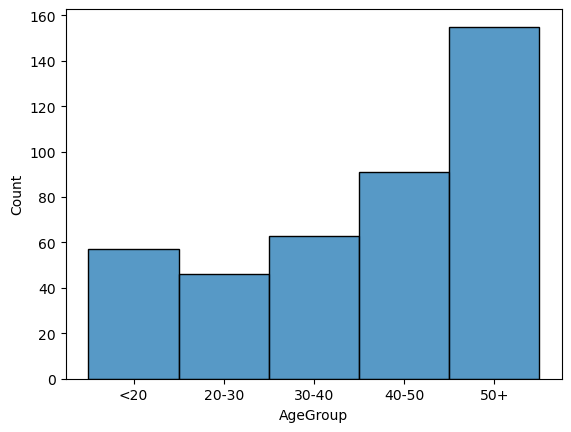

In [36]:
_ = sns.histplot(hearttrain["AgeGroup"])

####  Find median age

In [37]:
hearttrain['age'].median()

45.0

####  Find the relationship between the deaths and ages(the class column is your prediction variable)

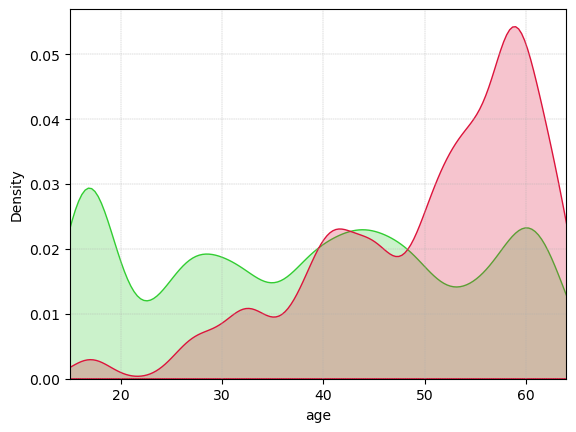

In [38]:
# KDE plot to show the relationship between the deaths and ages.
# Show legend in the graph
sns.kdeplot(data=hearttrain.loc[hearttrain["chd"] == 0], x="age", bw_adjust=0.5,
            color='limegreen', label='chd = 0', fill=True)
sns.kdeplot(data=hearttrain.loc[hearttrain["chd"] == 1], x="age", bw_adjust=0.5,
            color='crimson', label='chd = 1', fill=True)
plt.xlim(hearttrain['age'].min(), hearttrain['age'].max())

plt.grid(True, which='both', linestyle='--', linewidth=0.3)
plt.show()

<Axes: xlabel='age', ylabel='Count'>

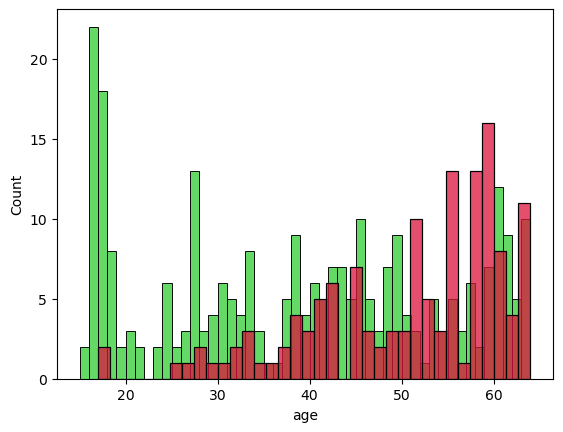

In [39]:
# count of people in the age group alive
sns.histplot(data=hearttrain.loc[hearttrain["chd"] == 0], x="age", bins=len(hearttrain.loc[hearttrain["chd"] == 0, "age"].unique()),
                color='limegreen', label='chd = 0', fill=True)

# count of people in the age group dead
sns.histplot(data=hearttrain.loc[hearttrain["chd"] == 1], x="age", bins=len(hearttrain.loc[hearttrain["chd"] == 1, "age"].unique()),
                color='crimson', label='chd = 1', fill=True)

#### Find the age groups whose survival rate is the largest

In [40]:
hearttrain["AgeGroup"] = pd.cut(hearttrain["age"],
                            bins=[hearttrain["age"].min()-1, 20, 30, 40, 50, hearttrain["age"].max()],
                            labels=['<20', '20-30', '30-40', '40-50', '50+'])

In [41]:
# Here we are finding the mean for each age group because we have 1(dead),0(alive) values. the mean will give the death rate
# if we substract death rate from 1 we get the survival rate.
chdgroup = 1.0 - hearttrain.groupby("AgeGroup")["chd"].mean()

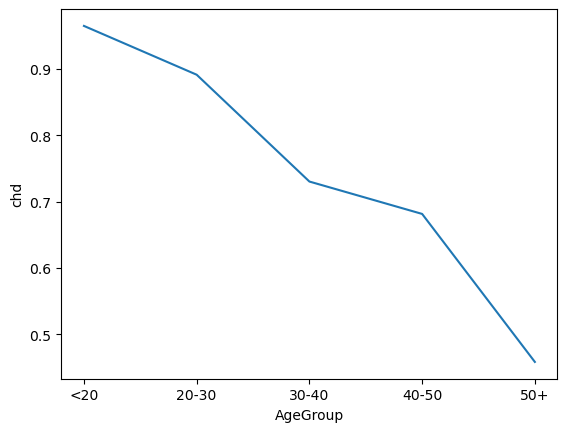

In [42]:
_ = sns.lineplot(chdgroup)

#### We can see from the above data that the age group less than 20 has largest survival rate.

####  Find similar relationships for at least 3-4 columns that you think can play a role in prediction

##### Age group having maximum consumption of alcohol/tobacco

In [129]:
ageGroup_order = ['<20', '20-30', '30-40', '40-50', '50+']
hearttrain["AgeGroup"] = pd.Categorical(hearttrain["AgeGroup"], categories=ageGroup_order, ordered=True)
hearttrain = hearttrain.sort_values('AgeGroup')
x_values = hearttrain["AgeGroup"]
y1_values = hearttrain["alcohol"]
y2_values = hearttrain["tobacco"]

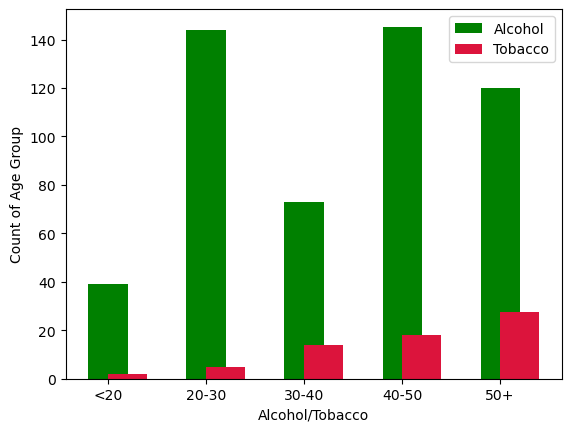

In [130]:
plt.bar(x_values, y1_values, width=0.4,color='green',label ='Alcohol', align='center')
plt.bar(x_values, y2_values, width=0.4,color='crimson',label='Tobacco', align='edge')
plt.xlabel('Alcohol/Tobacco')
plt.ylabel('Count of Age Group')
plt.legend()
plt.show()

##### Dead/alive having family history of cholestrol/obesity

In [131]:
x_chd = hearttrain["chd"]
y_cholestrol = hearttrain["ldl"]
y_obesity = hearttrain["obesity"]


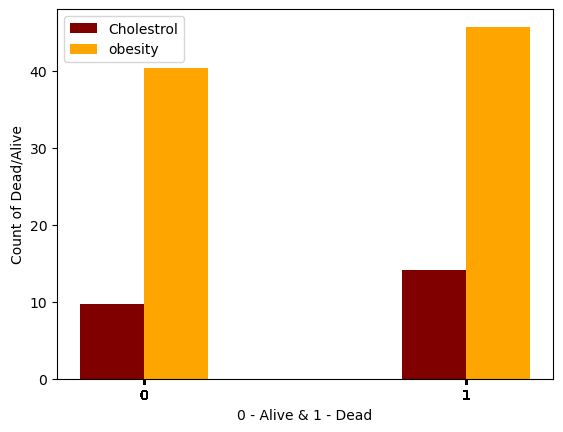

In [132]:
plt.bar(x_chd, y_cholestrol, width=0.4, color='maroon', label='Cholestrol', align='center')
plt.bar(x_chd, y_obesity, width=0.2, color='orange', label='obesity', align='edge')
plt.xticks(x_chd)
plt.xlabel('0 - Alive & 1 - Dead')
plt.ylabel('Count of Dead/Alive')
plt.legend()
plt.show()

##### People having family history of heart disease and its imapct on typea behaviour

In [133]:
x_famhist = hearttrain['famhist']
y_typea = hearttrain['chd']

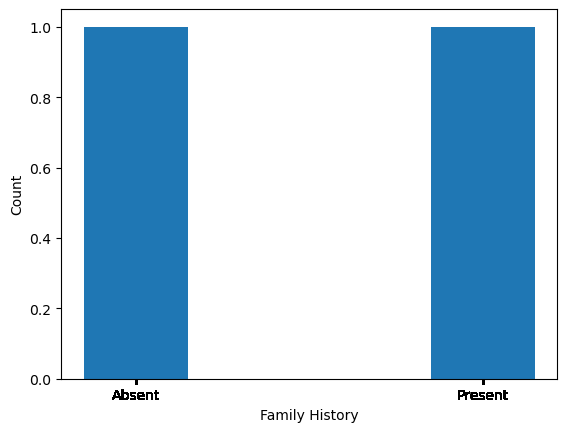

In [134]:
plt.bar(x_famhist, y_typea, width=0.3)
plt.xticks(x_famhist)
plt.xlabel('Family History')
plt.ylabel('Count')
plt.show()

#### Get more visuals on data distributions

##### (i) Use plotCorrelationMatrix

In [43]:
# use corr() method on dataframe to make correlation matrix
matrix = hearttrain.corr(numeric_only = True)
 
# print correlation matrix
print("Correlation Matrix is : ")
matrix

Correlation Matrix is : 


,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
sbp,1.000000,0.267291,0.156216,0.353743,-0.056496,0.265497,0.159742,0.403167,0.172282
tobacco,0.267291,1.000000,0.207281,0.309950,-0.043661,0.128732,0.184434,0.465815,0.292772
ldl,0.156216,0.207281,1.000000,0.441866,0.031730,0.345470,-0.024682,0.319435,0.272496
adiposity,0.353743,0.309950,0.441866,1.000000,-0.042981,0.748937,0.146022,0.603525,0.252710
typea,-0.056496,-0.043661,0.031730,-0.042981,1.000000,0.074852,0.064285,-0.146749,0.070108
obesity,0.265497,0.128732,0.345470,0.748937,0.074852,1.000000,0.124034,0.283060,0.113231
alcohol,0.159742,0.184434,-0.024682,0.146022,0.064285,0.124034,1.000000,0.096040,0.013459
age,0.403167,0.465815,0.319435,0.603525,-0.146749,0.283060,0.096040,1.000000,0.373637
chd,0.172282,0.292772,0.272496,0.252710,0.070108,0.113231,0.013459,0.373637,1.000000


<Axes: >

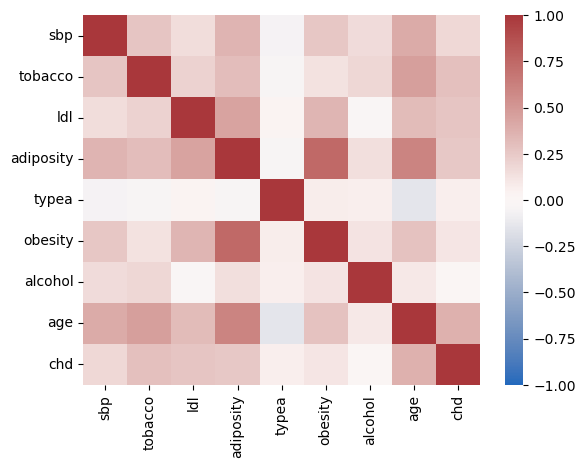

In [44]:
# heatmap for correlation matrix
sns.heatmap(matrix, vmin=-1, vmax=1, cmap='vlag')

##### (ii) plotScatterMatrix

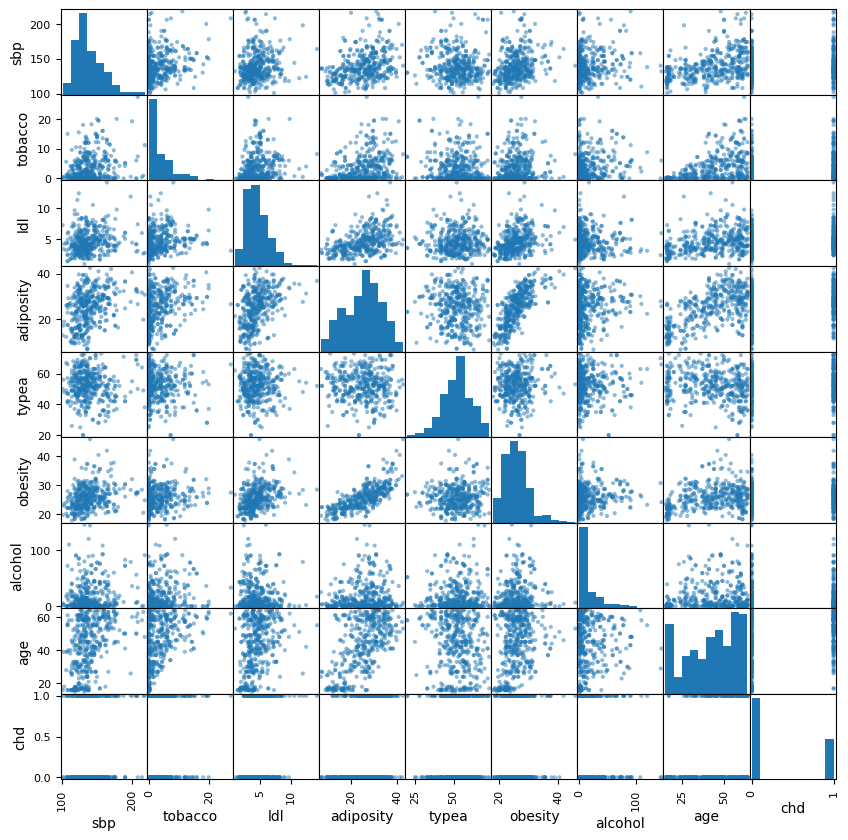

In [45]:
heart_train_S_matrix = pd.plotting.scatter_matrix(hearttrain, alpha=0.5,figsize = (10,10))

##### (iii) plotPerColumnDistribution

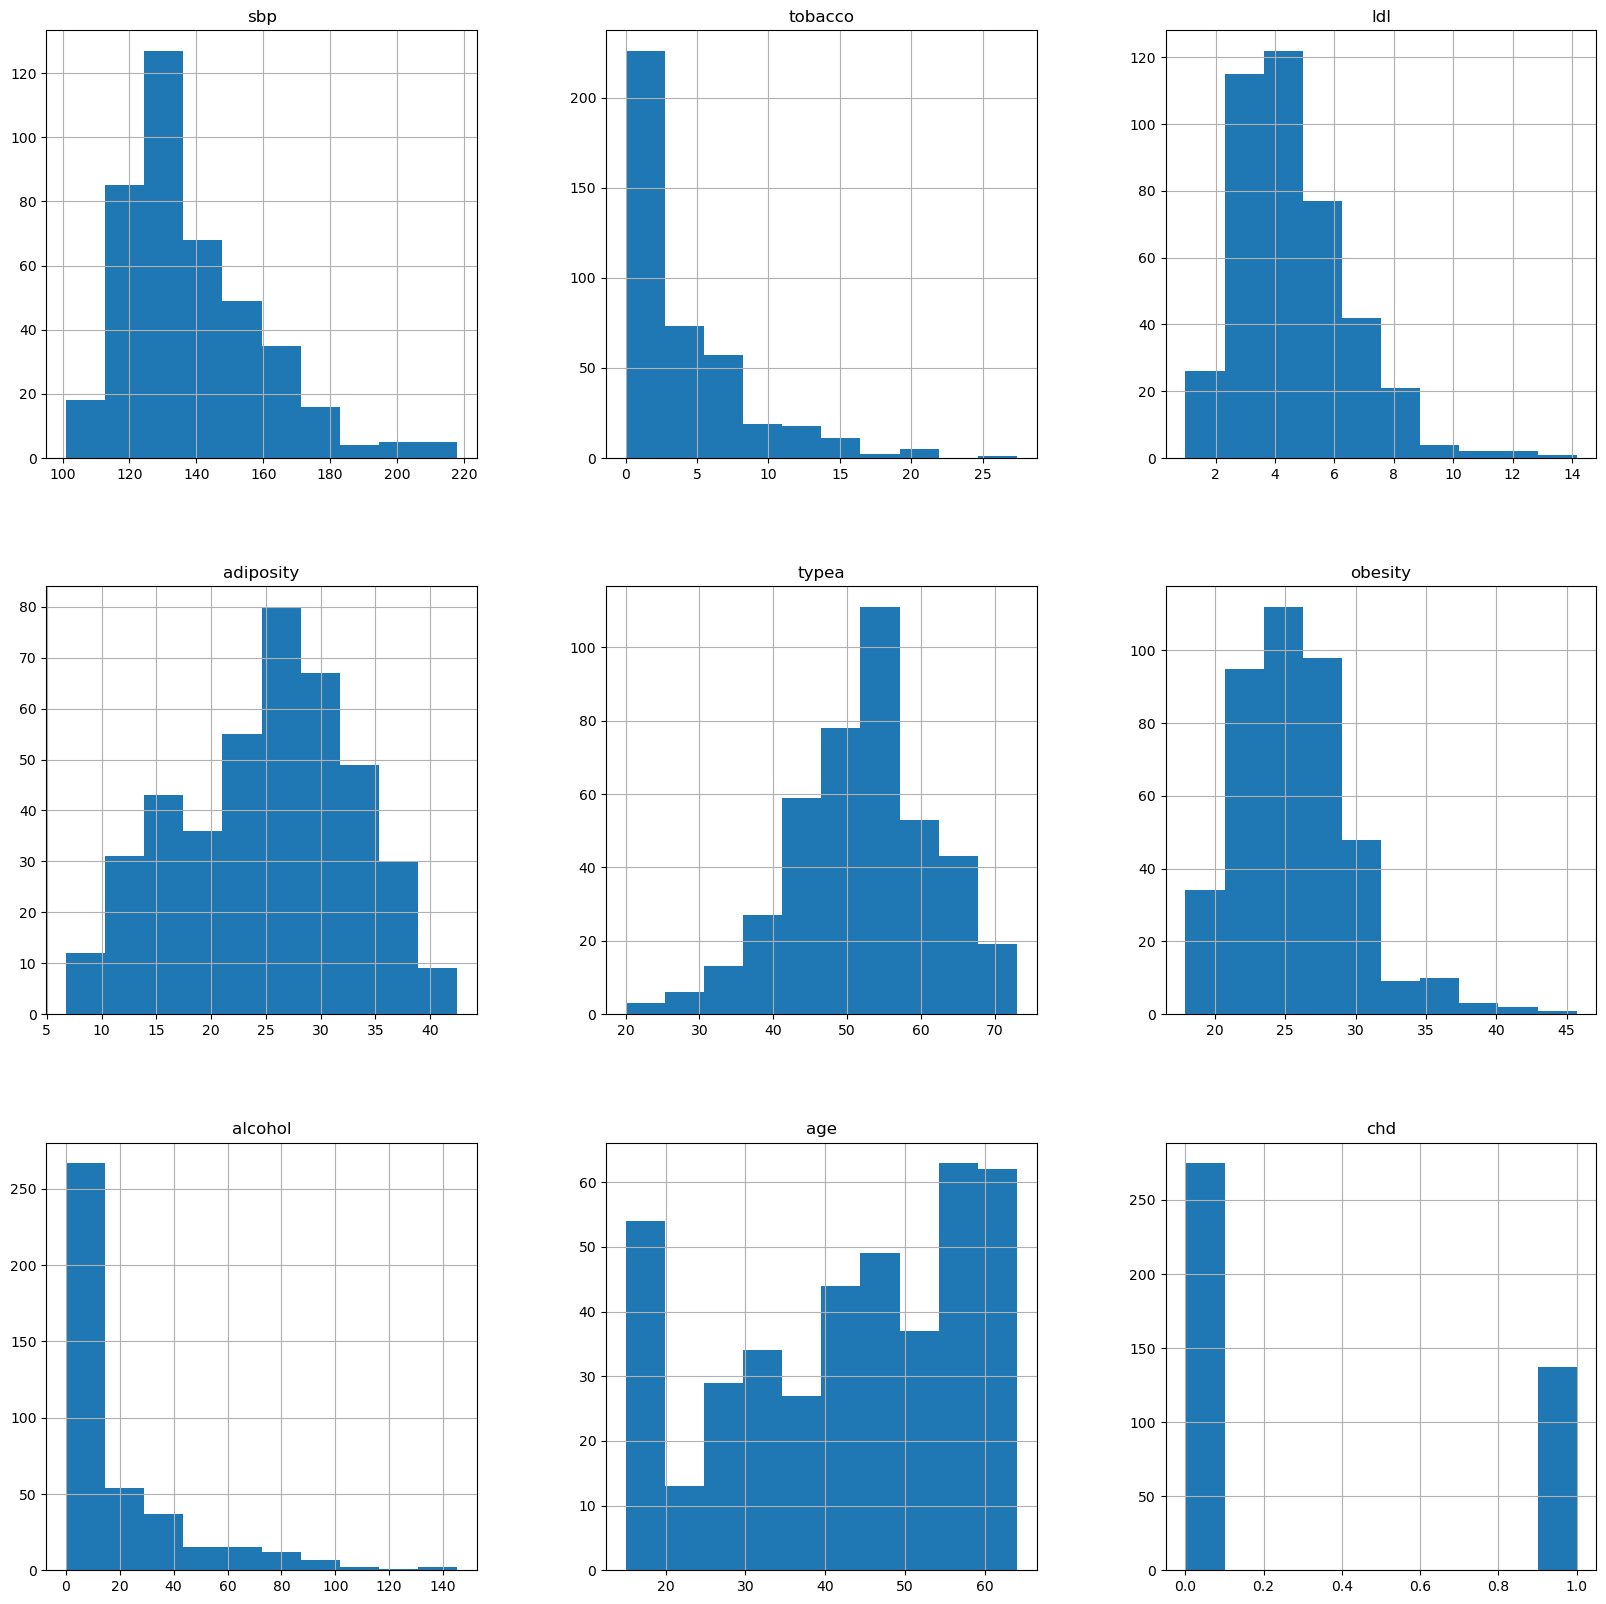

In [46]:
_ = hearttrain.hist(figsize=(20,20))

#### Check for the missing values, If they exist

##### missing values

In [47]:
hearttest.isnull().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
dtype: int64

In [48]:
hearttest.isna().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
dtype: int64

##### Get the count of missing values

In [49]:
hearttest.isna().sum()

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
dtype: int64

##### Plot a heat map for missing values

<Axes: >

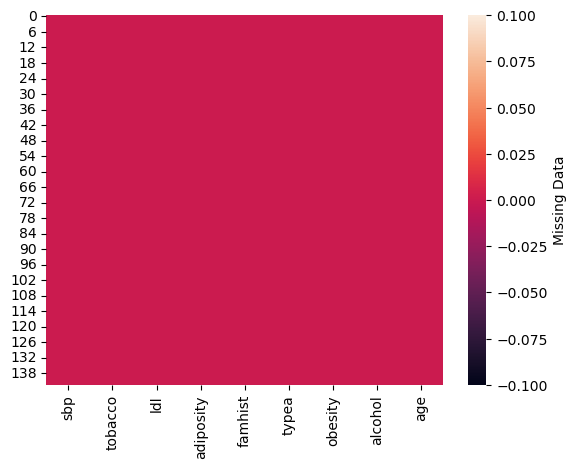

In [135]:
sns.heatmap(hearttest.isna(), cbar_kws={'label': 'Missing Data'})

from above, there are no null and missing values in the heart train dataset, so after plotting the heatmap for missing values it turns out to be unicolour.

####  Applying the feature scaling technique

Each column has a different range of values, which will introduce bias in
the regression model towards features with large ranges. Hence, we are
using __standardization__ to scale all the features.
To standardize the training data, we first learn the mean and standard
deviation for each column. Then we transform each column in the training
data using the formula ((X- mean)/std.dev).
For the test set, we use the same mean and standard deviation ( from
training data ) to standardize each column before making predictions.

In [50]:
# create dummy variables for categorical variable 'famhist'. This will split famhist into 2 new columns
# famhist_Present and famhist_Absent. We choose famhist_Present because both these columns will be highly correlated
# with each other.

#Y_train is the collection of all the dependent variables that will be used for training the logistic regression model.
Y_train = hearttrain.loc[:, "chd"]

# X_train is the collection of all the independent variables that will be used for training the logistic regression model.
X_train = pd.get_dummies(hearttrain).loc[:, ["sbp", "tobacco", "ldl", "adiposity", "typea", "obesity", "alcohol", "age", "famhist_Present"]]

In [51]:
# Y_test is the collection of all the dependent variables that will be used for testing and generating the final result.
Y_test = heartcomplete.merge(hearttest, on=hearttest.columns.to_list(), how="inner").loc[:, "chd"]

# X_test is the collection of all the independent variables that will be used for testing and generating the final result.
X_test = pd.get_dummies(hearttest).loc[:, ["sbp", "tobacco", "ldl", "adiposity", "typea", "obesity", "alcohol", "age", "famhist_Present"]] 

In [52]:
X_ranges = X_train.max() - X_train.min()
X_ranges

sbp                117.00
tobacco             27.40
ldl                 13.18
adiposity           35.75
typea               53.00
obesity             27.83
alcohol            145.29
age                 49.00
famhist_Present      1.00
dtype: float64

Each column has a different range of values, which will introduce bias in the regression model towards features with large ranges. Hence, we are using __standardization__ to scale all the features.

To standardize the training data, we first learn the mean and standard deviation for each column. Then we transform each column in the training data using the formula ((X- mean)/std.dev).

For the test set, we use the same mean and standard deviation ( from training data ) to standardize each column before making predictions.

In [53]:
standard_scaler = preprocessing.StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

#### Applying the regression models that is given below.
##### Use the following Logistic regression to handle the classification problems
##### logistic_regression = LogisticRegression()
##### logistic_regression.fit(X,Y)
##### print("Train: ", logistic_regression.score(X, Y))
##### print("Test: ", logistic_regression.score(x, y))
##### print("MSE:”,mean_squared_error(logistic_regression.predict(x), y, squared=True))
##### pred_lreg = logistic_regression.predict(test)

In [54]:
logistic_regression = linear_model.LogisticRegression()
logistic_regression.fit(X_train, Y_train)

LogisticRegression()

In [55]:
print("Train:", logistic_regression.score(X_train, Y_train))
print("Test:", logistic_regression.score(X_test, Y_test))
print("MSE:", metrics.mean_squared_error(logistic_regression.predict(X_test), Y_test, squared=True))

Train: 0.7330097087378641
Test: 0.7412587412587412
MSE: 0.25874125874125875


In [56]:
pred_lreg = logistic_regression.predict(X_test)

In [57]:
pred_lreg

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [58]:
Y_test.to_numpy()

array([1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [59]:
pd.DataFrame({
    'ID': np.arange(start=1, stop=len(pred_lreg)+1),
    'chd': pred_lreg}).to_csv('LogisticReg_submission.csv', index=False)

Conclusion: This dataset analysis shows many sides of coronary heart disease risk.
Besides modifiable factors like blood pressure, tobacco, and cholesterol levels,
non-modifiable factors like family history and age also play a role. It also suggests that
other factors like type-A behavior, alcohol consumption and obesity also play an
important role in identifying heart disease risk.